# Research Proposal

## 1. Introduction
This is a checkpoint for a Thinkful module that will demonstate my ability to assess and analyze a data set. 

I will be working with a data set created by IBM's data scientists regarding IBM employee attrition and Performance.

And I will be asking a few questions of the data set.

## 2. Hypothesis
The hypothesis we will be working with are as follows:

#### 1.
    Ho - Relationship satisfaction is not a factor with job satisfaction
    Ha - Relationship satisfaction is a factor in job satisfaction

#### 2. 
    Ho - Hourly rates are not a factor in attrition
    Ha - Hourly rate is a factor in attrition
    
#### 3. 
    Ho - A higher number of years since an employee's last promotion is not a faction in attrition for employees who have a long tenure with the company
    
    Ha - A higher number of years since an employee's last promotion is a factor in attrition for employees who have long tenure with the company

## 3. The Data

This data set is the IBM HR Analytics Employee Attrition & Performance Data Set. This data set is intereseting in that it may be helpful for IBM's HR and managers to see the important factors of job performance and attrition. The data can be found here:
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset, and it has 1470 observations and 35 variables.


In [4]:
#importing dependences and setting up environment
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('dark')
plt.style.use('dark_background')

In [5]:
#creating DF
df = pd.read_csv('https://raw.githubusercontent.com/dancassin/DATA/master/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [6]:
#basic inspection
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. Methods

**For Q1**, I will split the data into 4 categories based on the Relationship Satisfaction ratings 1-4 (Low, Medium, High, Very High) and use a Kruskal-Wallis test to see if there is a significant difference in Job Satisfaction ratings.

**For Q2**, I will split the data into 2 categories of employees with the company and those who have left. Then I will use a T-Test to see if there is a significant difference in Hourly Rates. Potentially a low paying job (little money) or a high paying job (too much stress) have higher attrition.

**For Q3**, I will filter the data at the 75%ile to study the longest-tenured employees. Then split the data by those who have left the company and those who are still with the company. Then I will use a Kruskal-Wallis test to see if there is a significant difference in the span of time since their last promotion to see if this was a factor in attrition.


---
### Q1. Does Relationship Satisfaction have any bearing on Job Satisfaction?
For our first question, let's look at the distributions of RelationshipSatisfaction and JobSatisfaction

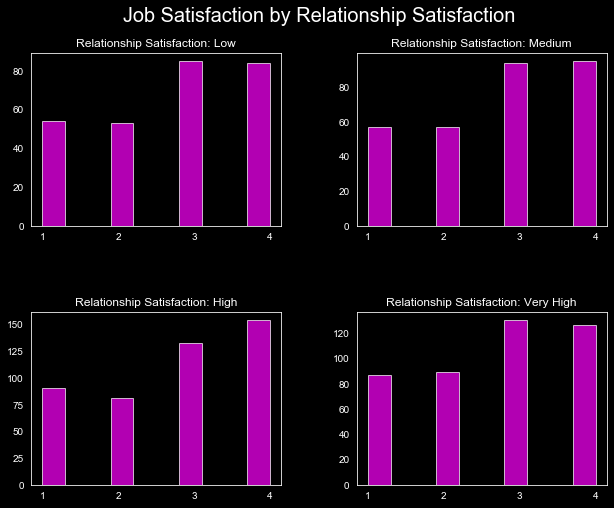

In [7]:
fig, ax = plt.subplots(2,2, figsize=(10,8))

df['JobSatisfaction'].hist(by = df['RelationshipSatisfaction'], ax=ax, color='magenta', alpha=.7);
status = ['Low', 'Medium', 'High','Very High']

k=0
n=0
for i in status:
  ax[n][k].set(title='Relationship Satisfaction: '+ i,xticks=np.arange(1,5))
  ax[n][k].set_xticklabels(np.arange(1,5), rotation=0)
  if k <1:
    k+=1
  elif k==1:
    k=0
    n=1
plt.suptitle('Job Satisfaction by Relationship Satisfaction', fontsize=20);


These are samples of ordinal data, so nothing will be perfectly "normal". We will do a Kruskal Wallis test to see if the medians are different.

In [8]:
#split into 4 DFs based on Relationship Satisfaction rating
df_poor_RS = df[df['RelationshipSatisfaction']==1]
df_okay_RS = df[df['RelationshipSatisfaction']==2]
df_good_RS = df[df['RelationshipSatisfaction']==3]
df_vgood_RS = df[df['RelationshipSatisfaction']==4]

In [9]:
#compare median Job Satisfaction of all 4 DFs
stats.kruskal(df_poor_RS['JobSatisfaction'],
              df_okay_RS['JobSatisfaction'],
              df_good_RS['JobSatisfaction'],
              df_vgood_RS['JobSatisfaction'])

KruskalResult(statistic=1.5159401735249394, pvalue=0.678596263523898)

### **Q1 RESULT**

The p-value is not significant, therefore we cannot reject the null hypothesis. The medians do not differ enough from one another to say that Relationship Satisfaction has any bearing on Job Satisfaction. 

---

### Q2. Does hourly rate have any bearing on attrition?
For our first question, let's inspect the columns before proceeding

In [10]:
df_HrRate = df[['HourlyRate', 'Attrition']]

print(df_HrRate.describe())
df_HrRate.head()

        HourlyRate
count  1470.000000
mean     65.891156
std      20.329428
min      30.000000
25%      48.000000
50%      66.000000
75%      83.750000
max     100.000000


,HourlyRate,Attrition
0,94,Yes
1,61,No
2,92,Yes
3,56,No
4,40,No


Now let's split our df into those who have and have not left the company, and plot the histograms of hourly rates for each:

In [11]:
df_HrRate_AttY = df_HrRate[df_HrRate['Attrition']=='Yes']
df_HrRate_AttN = df_HrRate[df_HrRate['Attrition']=='No']

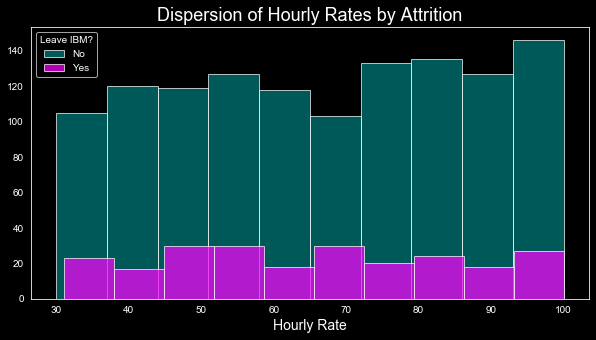

In [12]:
fig,ax = plt.subplots(figsize=(10,5))

plt.hist(df_HrRate_AttN['HourlyRate'], alpha=.7, color='Teal', label='No')
plt.hist(df_HrRate_AttY['HourlyRate'], alpha=.7, color='Magenta', label='Yes')

plt.title('Dispersion of Hourly Rates by Attrition', fontsize=18)
plt.legend(title='Leave IBM?')
ax.set_xlabel('Hourly Rate', fontsize=14);

Let's verify if these distributions are normal:

In [13]:
print(stats.describe(df_HrRate_AttN['HourlyRate']))
print(stats.describe(df_HrRate_AttY['HourlyRate']))

DescribeResult(nobs=1233, minmax=(30, 100), mean=65.9521492295215, variance=415.37514351018, skewness=-0.04789611498499753, kurtosis=-1.2034774982971257)
DescribeResult(nobs=237, minmax=(31, 100), mean=65.57383966244726, variance=404.00829578774227, skewness=0.05136123289556325, kurtosis=-1.1530725173123975)


Variables seem to be within normal ranges for skewness and kurtosis. Let's run a t-test:

In [15]:
stats.ttest_ind(df_HrRate_AttY['HourlyRate'],df_HrRate_AttN['HourlyRate'])

Ttest_indResult(statistic=-0.26228987349264493, pvalue=0.7931347689944243)

### **Q2 RESULT**

Hourly rates do not have an affect on Attrition

---

### **Q3.** Does a lack of recent promotions for long term employees have an affect on attrition?

In [17]:
#creating a smaller df of the variables we will investigate
seniority_attr = df[['YearsAtCompany','YearsSinceLastPromotion', 'Attrition']]

seniority_attr.info()
seniority_attr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 3 columns):
YearsAtCompany             1470 non-null int64
YearsSinceLastPromotion    1470 non-null int64
Attrition                  1470 non-null object
dtypes: int64(2), object(1)
memory usage: 34.5+ KB


,YearsAtCompany,YearsSinceLastPromotion,Attrition
0,6,0,Yes
1,10,1,No
2,0,0,Yes
3,8,3,No
4,2,2,No


In [18]:
seniority_attr.describe()
#YearsAtCompany 75 percentile will be our demarcation for long-term employees

,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000
mean,7.008163,2.187755
std,6.126525,3.222430
min,0.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,9.000000,3.000000
max,40.000000,15.000000


In [19]:
#look at unique values of each column
print('Unique Years at Company')
print(sorted(seniority_attr['YearsAtCompany'].unique()))
print('\n')
print('Unique Years Since Last Promotion')
print(sorted(seniority_attr['YearsSinceLastPromotion'].unique()))

Unique Years at Company
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 40]


Unique Years Since Last Promotion
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


We will filter YearsAtCompany at >=9 (per the .describe() method above) for the highest quantile, and then we will split years since last promotion at the median.

In [20]:
high_seniority_attr = seniority_attr[seniority_attr['YearsAtCompany']>=9]

high_seniority_attr.info()
print(sorted(high_seniority_attr['YearsSinceLastPromotion'].unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 1 to 1468
Data columns (total 3 columns):
YearsAtCompany             448 non-null int64
YearsSinceLastPromotion    448 non-null int64
Attrition                  448 non-null object
dtypes: int64(2), object(1)
memory usage: 14.0+ KB
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Let's find our median so we can hopefully get equal sample sizes to compare

In [21]:
high_seniority_attr['YearsSinceLastPromotion'].median()

4.0

In [24]:
#splitting DFs at the median

# 9+ year seniority with recent promotion
high_sen_rec_promote = high_seniority_attr[high_seniority_attr['YearsSinceLastPromotion']<=4]

# 9+ year seniority with distant promotion
high_sen_dist_promote = high_seniority_attr[high_seniority_attr['YearsSinceLastPromotion']>=5]

high_sen_rec_promote.info() 
print('\n')
high_sen_dist_promote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 1468
Data columns (total 3 columns):
YearsAtCompany             250 non-null int64
YearsSinceLastPromotion    250 non-null int64
Attrition                  250 non-null object
dtypes: int64(2), object(1)
memory usage: 7.8+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 15 to 1462
Data columns (total 3 columns):
YearsAtCompany             198 non-null int64
YearsSinceLastPromotion    198 non-null int64
Attrition                  198 non-null object
dtypes: int64(2), object(1)
memory usage: 6.2+ KB


Total number of observations is similar. Let's look at these distributions:

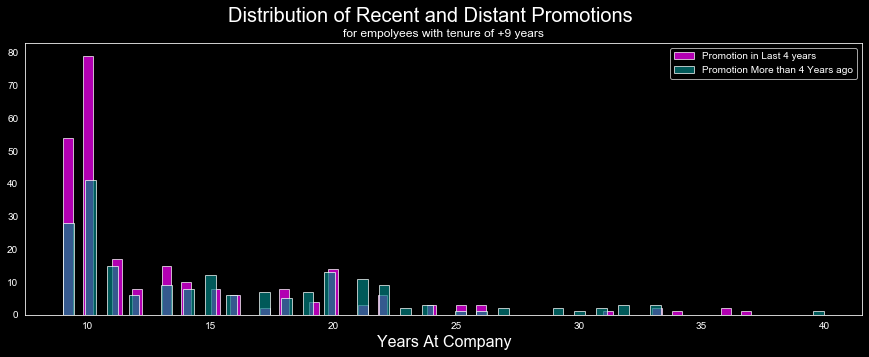

In [25]:
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(high_sen_rec_promote['YearsAtCompany'], alpha=.7, color='magenta', label='Promotion in Last 4 years', bins=70)
ax.hist(high_sen_dist_promote['YearsAtCompany'], alpha=.7, color='teal', label='Promotion More than 4 Years ago', bins=70);

plt.xlabel('Years At Company', fontsize=16)
plt.suptitle('Distribution of Recent and Distant Promotions', fontsize=20)
plt.title('for empolyees with tenure of +9 years')
plt.legend();

Let's split these distributions by attrition as well:

In [27]:
#employees +9 years, recent promotion, left company
high_sen_rec_promote_attrY = high_sen_rec_promote[high_sen_rec_promote['Attrition']=='Yes']

#employees +9 years, recent promotion, with company
high_sen_rec_promote_attrN = high_sen_rec_promote[high_sen_rec_promote['Attrition']=='No']

#employees +9 years, recent promotion, left company
high_sen_dist_promote_attrY = high_sen_dist_promote[high_sen_dist_promote['Attrition']=='Yes']

#employees +9 years, recent promotion, with company
high_sen_dist_promote_attrN = high_sen_dist_promote[high_sen_dist_promote['Attrition']=='No']

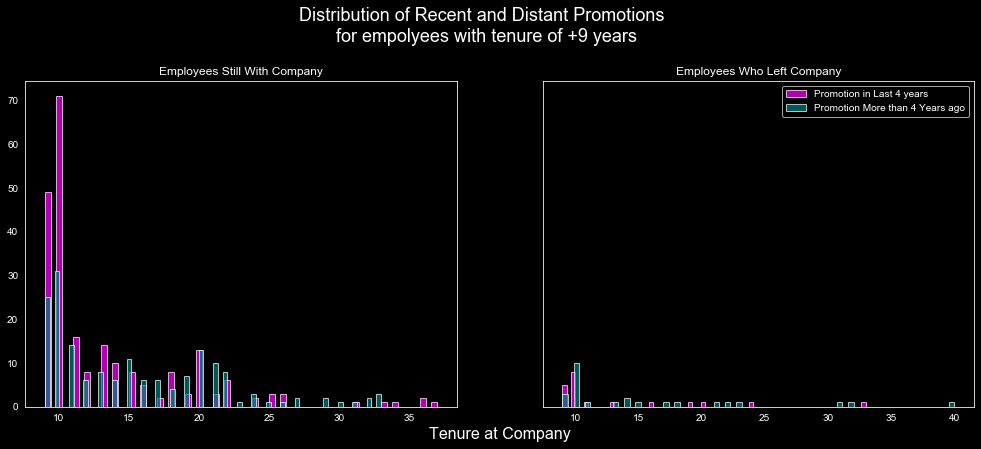

In [33]:
fig, ax = plt.subplots(1,2, figsize=(17,6), sharey=True)

ax[0].hist(high_sen_rec_promote_attrN['YearsAtCompany'], alpha=.7, color='magenta', label='Promotion in Last 4 years', bins=70)
ax[0].hist(high_sen_dist_promote_attrN['YearsAtCompany'], alpha=.7, color='teal', label='Promotion More than 4 Years ago', bins=70)
ax[0].set(title='Employees Still With Company')

ax[1].hist(high_sen_rec_promote_attrY['YearsAtCompany'], alpha=.7, color='magenta', label='Promotion in Last 4 years', bins=70)
ax[1].hist(high_sen_dist_promote_attrY['YearsAtCompany'], alpha=.7, color='teal', label='Promotion More than 4 Years ago', bins=70)
ax[1].set(title='Employees Who Left Company')
ax[1].set_xlabel('Tenure at Company',{'position':(-.1,1.1),'fontsize':16})


plt.suptitle('Distribution of Recent and Distant Promotions \n for empolyees with tenure of +9 years', fontsize=18, x=.5, y=1.05)

plt.legend();

Now, in order to compare these for a significance test, we will split by attrition first and compare promotion rates.

In [34]:
high_seniority_attrN = high_seniority_attr[high_seniority_attr['Attrition']=='No']
high_seniority_attrY = high_seniority_attr[high_seniority_attr['Attrition']=='Yes']

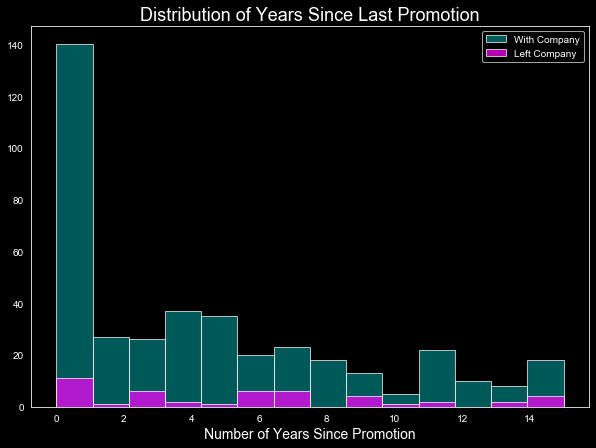

In [35]:
fig = plt.subplots(figsize=(10,7))
plt.hist(high_seniority_attrN['YearsSinceLastPromotion'], alpha=.7, color='teal', label='With Company', bins=14)
plt.hist(high_seniority_attrY['YearsSinceLastPromotion'], alpha=.7, color='magenta', label='Left Company',bins=14)
plt.title('Distribution of Years Since Last Promotion', fontsize=18)
plt.xlabel('Number of Years Since Promotion', fontsize=14)
plt.legend();

Similar to the fist question, these are samples of ordinal data, so nothing will be perfectly "normal". We will do a Kruskal Wallis test to see if the medians are significantly different.

In [36]:
print(f'For employees still with the company, the median number of years since last promotion is: {high_seniority_attrN.YearsSinceLastPromotion.median()}')
print(f'For employees who left the company, the median number of years since last promotion is: {high_seniority_attrY.YearsSinceLastPromotion.median()}')
print('\n')
print(stats.kruskal(high_seniority_attrN['YearsSinceLastPromotion'], high_seniority_attrY['YearsSinceLastPromotion']))

For employees still with the company, the median number of years since last promotion is: 4.0
For employees who left the company, the median number of years since last promotion is: 6.0


KruskalResult(statistic=4.015766512525693, pvalue=0.04507672892174258)


### **Q3 RESULT**

The median number of years since last promotion is higher in those who have left the company and the Kruskal-Wallace test results say this difference is significant. 

## 5. Results Summary

**Q1 RESULT**
The p-value is not significant, therefore we cannot reject the null hypothesis. The medians do not differ enough from one another to say that Relationship Satisfaction has any bearing on Job Satisfaction. 

**Q2 RESULT**
Same as Q1, the t-test did not show any significance. Hourly rates do not have an affect on Attrition

**Q3 RESULT**
The median number of years since last promotion is higher in those who have left the company and the Kruskal-Wallace test results say this difference is significant. 


## 6. Conclusions

IBM's HR may be interested to see that those employees with long tenure at the company who choose to leave tend to have a longer gap since their last promotion than similarly tenured employees.

This was an interesting exercise and there is still more in this data set that could be uncovered. We could dive deeper into Hourly rates v. Salary, Job satisfaction affecting Job Performance, or see if there are any abnomalities in level of education and level of pay rate.